### **기계학습(8585) 기말고사 대체 과제 : 제품 review 데이터의 감성 분석**
**202121873 황호준**

학번이 홀수로 끝나는 학생은 amazon_uk_shoes_products_dataset_2021_12.csv를 분석


*   Python Version : Python 3.10.12



### **1. 데이터 전처리**


In [1]:
# 필요 라이브러리 설치
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install nltk

# 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.1/775.1 kB 16.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.4 MB/s et

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...


True

## 1) 데이터 로드

In [2]:
# 데이터 로드
data_path = 'amazon_uk_shoes_products_dataset_2021_12.csv'
df = pd.read_csv(data_path)

# 데이터프레임의 기본 정보 확인
df.info()

# 데이터의 상위 5개 행 확인
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823 entries, 0 to 6822
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                6823 non-null   object 
 1   product_name       6823 non-null   object 
 2   reviewer_name      6823 non-null   object 
 3   review_title       6822 non-null   object 
 4   review_text        6814 non-null   object 
 5   review_rating      6823 non-null   float64
 6   verified_purchase  6823 non-null   bool   
 7   review_date        6823 non-null   object 
 8   helpful_count      1953 non-null   object 
 9   uniq_id            6823 non-null   object 
 10  scraped_at         6823 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 539.8+ KB


,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25


데이터를 로드하고 데이터 프레임을 살펴봅니다. 총 11가지로 아래와 같이 데이터가 이루어져있음을 확인할 수 있습니다.

1. url
2. product_name
3. reviewer_name
4. review_title
5. review_text
6. review_rating
7. verified_purchase
8. review_date
9. helpful_count
10. uniq_id
11. scraped_at

## 2) 결측치 제거

In [3]:
# 결측치 확인
missing_values = df.isnull().sum()
print("결측치 갯수:\n", missing_values)

결측치 갯수:
 url                     0
product_name            0
reviewer_name           0
review_title            1
review_text             9
review_rating           0
verified_purchase       0
review_date             0
helpful_count        4870
uniq_id                 0
scraped_at              0
dtype: int64


데이터프레임의 각 열에 결측치가 얼마나 있는지 확인하고, 결측치의 갯수를 출력하여 결측치가 존재하는지 파악합니다.

In [4]:
# helpful_count 열 제거
df.drop(columns=["helpful_count"], inplace=True)

In [5]:
# 결측치가 존재하는 행 제거
df.dropna(inplace=True)

helpful_count 열은 결측치가 너무 많아 학습에 유용하지 않다고 판단하여 제거했습니다. 남아있는 열에서 결측치가 존재하는 행을 제거하여 데이터의 완전성을 유지합니다.

In [6]:
# 결측치 여부 재확인
missing_values_after = df.isnull().sum()
print("결측치 제거 후 갯수:\n", missing_values_after)

결측치 제거 후 갯수:
 url                  0
product_name         0
reviewer_name        0
review_title         0
review_text          0
review_rating        0
verified_purchase    0
review_date          0
uniq_id              0
scraped_at           0
dtype: int64


In [7]:
# 각 열의 데이터 갯수 확인
data_count = df.count()
print("결측치 제거 후 각 열의 데이터 갯수:\n", data_count)

결측치 제거 후 각 열의 데이터 갯수:
 url                  6813
product_name         6813
reviewer_name        6813
review_title         6813
review_text          6813
review_rating        6813
verified_purchase    6813
review_date          6813
uniq_id              6813
scraped_at           6813
dtype: int64


결측치 제거 후 각 열에 남아있는 결측치를 다시 확인하고, 결측치 제거 후 각 열의 데이터 갯수를 확인하여 데이터가 올바르게 정리되었는지 확인합니다.

## 3) 데이터 프레임 정리

In [8]:
# 감정 분석에 필요한 열만 남기고 나머지 제거
df = df[['review_text', 'review_rating', 'review_title']]

# 데이터프레임의 기본 정보 확인
df.info()

# 데이터의 상위 5개 행 확인
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6813 entries, 0 to 6822
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_text    6813 non-null   object 
 1   review_rating  6813 non-null   float64
 2   review_title   6813 non-null   object 
dtypes: float64(1), object(2)
memory usage: 212.9+ KB


,review_text,review_rating,review_title
0,Love these. Was looking for converses and thes...,5.0,Love em
1,"The shoes are very cute, but after the 2nd day...",2.0,The plastic ripped
2,Good quality,5.0,Good quality
3,Great,5.0,Good
4,Ho scelto il modello bianco con rifinitura die...,5.0,PERFETTE!!


감정분석에 직접적으로 의미가 있는 'review.text', 'review_rating', 'review_title' 열을 제외하고 데이터 프레임을 제거하여 정리하였습니다. 이후 데이터의 예시를 직접 확인하여 데이터가 예상대로 정리되었는지를 확인합니다.

## 4) 노이즈, 불용어 제거 및 토큰화 진행

In [9]:
# 노이즈 제거 및 텍스트 전처리 함수 정의
def clean_and_preprocess_text(text):
    # 영어 대소문자와 공백을 제외한 모든 문자 제거
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # 소문자로 변환
    text = text.lower()
    # 여러 공백을 하나의 공백으로 치환
    text = re.sub(r'\s+', ' ', text).strip()
    # 토큰화
    tokens = word_tokenize(text)
    # 불용어 제거 및 표제어 추출
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

# 리뷰 제목과 리뷰 텍스트에 함수 적용
df['cleaned_reviewText'] = df['review_text'].apply(clean_and_preprocess_text)
df['cleaned_reviewTitle'] = df['review_title'].apply(clean_and_preprocess_text)

# 전처리된 텍스트 데이터 확인
df[['review_text', 'cleaned_reviewText', 'review_title', 'cleaned_reviewTitle']].head()

,review_text,cleaned_reviewText,review_title,cleaned_reviewTitle
0,Love these. Was looking for converses and thes...,love looking converse half price unique ive ne...,Love em,love em
1,"The shoes are very cute, but after the 2nd day...",shoe cute nd day wearing tongue started rippin...,The plastic ripped,plastic ripped
2,Good quality,good quality,Good quality,good quality
3,Great,great,Good,good
4,Ho scelto il modello bianco con rifinitura die...,ho scelto il modello bianco con rifinitura die...,PERFETTE!!,perfette


In [10]:
# 텍스트 토큰화
df['tokenized_reviewTitle'] = df['cleaned_reviewTitle'].apply(word_tokenize)
df['tokenized_reviewText'] = df['cleaned_reviewText'].apply(word_tokenize)

# 토큰화된 텍스트 데이터 확인
df[['cleaned_reviewTitle', 'tokenized_reviewTitle', 'cleaned_reviewText', 'tokenized_reviewText']].head()

,cleaned_reviewTitle,tokenized_reviewTitle,cleaned_reviewText,tokenized_reviewText
0,love em,"[love, em]",love looking converse half price unique ive ne...,"[love, looking, converse, half, price, unique,..."
1,plastic ripped,"[plastic, ripped]",shoe cute nd day wearing tongue started rippin...,"[shoe, cute, nd, day, wearing, tongue, started..."
2,good quality,"[good, quality]",good quality,"[good, quality]"
3,good,[good],great,[great]
4,perfette,[perfette],ho scelto il modello bianco con rifinitura die...,"[ho, scelto, il, modello, bianco, con, rifinit..."


텍스트 데이터를 전처리하고 노이즈를 제거합니다. 텍스트에서 불필요한 문자, 불용어 등을 제거하고 토큰화하여 분석에 적합한 형태로 변환합니다. 전처리된 텍스트 데이터를 토큰화하고 전처리된 텍스트와 토큰화된 텍스트를 비교하여 제대로 토큰화가 수행되었는지 확인합니다.

In [12]:
# 전처리된 텍스트와 감정 분석 점수를 포함하는 파일로 저장
df.to_csv('/content/cleaned_amazon_uk_shoes_reviews.csv', index=False)

# 파일 저장 확인
print("전처리된 데이터를 저장했습니다.")

OSError: Cannot save file into a non-existent directory: '/content'

### **2. 모델 구현**

## 1) VADER 모델 활용 감정 분석 진행

In [12]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 전처리된 데이터 로드
data_path = '/content/cleaned_amazon_uk_shoes_reviews.csv'
df = pd.read_csv(data_path)

# VADER 감정 분석기 초기화
analyzer = SentimentIntensityAnalyzer()

# VADER 감정 분석 적용 함수 정의
def safe_polarity_scores(text):
    try:
        return analyzer.polarity_scores(str(text))
    except:
        return {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

데이터를 로드한 후, CADER 감정 분석기를 초기화하고 감정 분석 점수를 계산할 수 있는 함수를 정의합니다. 이 함수는 텍스트를 문자열로 변환한 후 감정 점수를 계산하고 예외가 발생하면 감정 점수를 0.0으로 설정하도록 하였습니다.

In [13]:
# VADER 감정 분석 적용
df['vader_text_scores'] = df['cleaned_reviewText'].apply(safe_polarity_scores)
df['vader_text_compound'] = df['vader_text_scores'].apply(lambda x: x['compound'])

df['vader_title_scores'] = df['cleaned_reviewTitle'].apply(safe_polarity_scores)
df['vader_title_compound'] = df['vader_title_scores'].apply(lambda x: x['compound'])

# 결과 확인
print(df[['review_text', 'cleaned_reviewText', 'vader_text_scores', 'vader_text_compound',
          'review_title', 'cleaned_reviewTitle', 'vader_title_scores', 'vader_title_compound']].head())

                                         review_text  \
0  Love these. Was looking for converses and thes...   
1  The shoes are very cute, but after the 2nd day...   
2                                       Good quality   
3                                              Great   
4  Ho scelto il modello bianco con rifinitura die...   

                                  cleaned_reviewText  \
0  love looking converse half price unique ive ne...   
1  shoe cute nd day wearing tongue started rippin...   
2                                       good quality   
3                                              great   
4  ho scelto il modello bianco con rifinitura die...   

                                   vader_text_scores  vader_text_compound  \
0  {'neg': 0.067, 'neu': 0.463, 'pos': 0.469, 'co...               0.9188   
1  {'neg': 0.058, 'neu': 0.858, 'pos': 0.083, 'co...               0.2240   
2  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...               0.4404   
3  {'neg': 0.0, 'n

각 열에 대한 긍정적, 중립적, 부정적 VADER 감정분석 점수 결과를 확인할 수 있습니다.

In [14]:
# vader_compound 값을 이진 값으로 변경하는 함수 정의
def convert_to_binary(compound_score):
    return 1 if compound_score >= 0 else 0

# 이진 값으로 변경 적용
df['text_sentiment'] = df['vader_text_compound'].apply(convert_to_binary)
df['title_sentiment'] = df['vader_title_compound'].apply(convert_to_binary)

# 변경 결과 확인
print(df[['review_text', 'cleaned_reviewText', 'vader_text_compound', 'text_sentiment',
          'review_title', 'cleaned_reviewTitle', 'vader_title_compound', 'title_sentiment']].head())

                                         review_text  \
0  Love these. Was looking for converses and thes...   
1  The shoes are very cute, but after the 2nd day...   
2                                       Good quality   
3                                              Great   
4  Ho scelto il modello bianco con rifinitura die...   

                                  cleaned_reviewText  vader_text_compound  \
0  love looking converse half price unique ive ne...               0.9188   
1  shoe cute nd day wearing tongue started rippin...               0.2240   
2                                       good quality               0.4404   
3                                              great               0.6249   
4  ho scelto il modello bianco con rifinitura die...              -0.4588   

   text_sentiment        review_title cleaned_reviewTitle  \
0               1             Love em             love em   
1               1  The plastic ripped      plastic ripped   
2               1

compound_score 값을 이진 값으로 변환하는 함수를 정의하여 종합점수를 이진값으로 변환하여 긍정(1)과 부정(0)으로 구분합니다. 종합 점수가 0 이상이면 긍정으로 간주하여 1을 반환, 0 미만이면 부정으로 간주하여 0을 반환하도록 했습니다.

In [15]:
# 필요한 열만 포함하는 새로운 데이터프레임 생성
df_review = df[['cleaned_reviewText', 'text_sentiment', 'cleaned_reviewTitle', 'title_sentiment']]

# 데이터프레임 확인
df_review

,cleaned_reviewText,text_sentiment,cleaned_reviewTitle,title_sentiment
0,love looking converse half price unique ive ne...,1,love em,1
1,shoe cute nd day wearing tongue started rippin...,1,plastic ripped,1
2,good quality,1,good quality,1
3,great,1,good,1
4,ho scelto il modello bianco con rifinitura die...,0,perfette,1
...,...,...,...,...
6808,schicker schuh luft sich gut,1,schick und leicht,1
6809,mieux que je ne limaginais trs bonne taille bo...,1,excellent,1
6810,habe sie al geschenk gekauft und sie sind sehr...,1,einfach schne hausschuhe,1
6811,trage diese hausschuhe fast zwei monate jeden ...,0,langlebig,1


In [16]:
# 데이터프레임 저장
df_review.to_csv('/content/cleaned_amazon_uk_shoes_reviews_with_sentiment.csv', index=False)
print("전처리된 데이터를 저장했습니다.")

전처리된 데이터를 저장했습니다.


이진 값으로 변환된 결과를 데이터 프레임으로 정리하여 저장하였고, 모델 학습을 하기위한 준비가 완료되었습니다.

### **3. 모델 학습 및 튜닝**

모델은 로지스틱 회귀 모델을 사용하며, 하이퍼 파라미터 튜닝 기법은 그리드 서치를 사용하여 최적의 하이퍼파라미터 값을 찾고 교차 검증 점수를 확인합니다.

## 1) 데이터 레이블 설정 및 훈련 테스트 데이터 분할

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 전처리된 데이터 로드
data_path = '/content/cleaned_amazon_uk_shoes_reviews_with_sentiment.csv'
df_review = pd.read_csv(data_path)

# 입력 데이터와 레이블 설정
X = df_review['cleaned_reviewText'].fillna('')  # NaN 값을 빈 문자열로 대체
y = df_review['text_sentiment']

# 데이터 분할 (80% 훈련 데이터, 20% 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

데이터를 훈련 데이터와 테스트 데이터로 분할하고, 8:2비율로 사용합니다.

## 2) 데이터 백터화 진행

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

TF-IDF 벡터화를 통해서 텍스트 데이터를 벡터 형태로 변환합니다. 텍스트 데이터를 수치 데이터로 변환하여 모델이 이를 입력으로 받아들일 수 있도록 합니다.

## 3) Logistic Regression 모델 초기화 및 그리드 서치 활용

In [27]:
import warnings

# 모든 경고 메시지를 무시합니다
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Logistic Regression 모델 초기화
logreg = LogisticRegression(max_iter=1000)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l1', 'l2']
}

# 그리드 서치 및 교차 검증 설정
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# 그리드 서치를 통한 모델 학습
grid_search.fit(X_train_tfidf, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9453211009174313


로지스틱 회귀 모델을 초기화하여 감정 분류 모델을 생성합니다. 최대 반복 횟수는 1000으로 설정했습니다.

이후 그리드 서치를 위한 하이퍼파라미터를 설정하고, 다양한 하이퍼파라미터 조합을 통해 최적의 모델을 찾기 위해 여러가지 옵션을 지정한 뒤 교차검증을 통해 모델을 학습시킵니다.

최적의 하이퍼파라미터 조합은 C:10에서 가장 최적의 결과를 보였고, 교차점수는 약 94%임을 확인합니다.

## 4) 최적 모델 활용하여 학습 및 예측 진행

In [20]:
# 최적 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# 예측 결과 확인
print("예측 결과:\n", y_pred)

예측 결과:
 [1 1 1 ... 1 1 1]


최적의 하이퍼 파라미터 값 C:10으로 학습된 모델을 사용하여 테스트 데이터를 예측합니다.

### **4. 모델평가**


학습한 모델에 대한 평가를 진행합니다.
평가 지표로 정확도(accuracy), 정밀도(precision), 재현률(recall), F1 점수, ROC-AUC를 사용합니다.

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

# 전체 모델 분류 보고서 출력
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.9479090242112986
Precision: 0.9683597002497918
Recall: 0.9724080267558528
F1 Score: 0.9703796412181893
ROC-AUC Score: 0.872431558288106
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       167
           1       0.97      0.97      0.97      1196

    accuracy                           0.95      1363
   macro avg       0.88      0.87      0.88      1363
weighted avg       0.95      0.95      0.95      1363



각각 평가지표는 다음과 같습니다.

*   Accuracy (정확도): 0.9479090242112986

전체 데이터 중에서 모델이 올바르게 예측한 비율입니다. 94.79%의 정확도로 모델이 감정을 예측했습니다.

*   Precision (정밀도): 0.9683597002497918

긍정으로 예측한 것들 중에서 실제 긍정인 비율입니다. 96.83%의 정밀도로 긍정 감정을 예측했습니다.

*   Recall (재현율): 0.9724080267558528

실제 긍정인 것들 중에서 모델이 긍정으로 예측한 비율입니다. 97.24%의 재현율로 긍정 감정을 예측했습니다.

*   F1 Score: 0.9703796412181893

정밀도와 재현율의 조화 평균입니다. 97.04%의 F1 점수를 기록했습니다.

*   ROC-AUC Score: 0.872431558288106

ROC 곡선 아래의 면적을 나타냅니다. 0.87의 점수로, 모델의 분류 능력이 높음을 의미합니다.

모델은 전체적으로 높은 정확도, 정밀도, 재현율, F1 점수에서 우수한 성능을 보여주고 있습니다. 이 결과를 통해 보았을 때, 언더피팅의 문제는 없다고 판단할 수 있습니다. 오버피팅의 경우 최고 교차 검증 점수 0.9453와 테스트 데이터 점수 정확도 0.9479를 비교해보았을 때, 두 값이 유사하다고 볼 수 있기때문에 학습 데이터에 대해서만 잘 맞추어진 것이 아니라, 테스트 데이터에 대해서도 잘 일반화되었음을 나타냅니다.

추가적으로, 긍정 감정(1)에서 매우 높은 성능을 기록하였으며, 부정 감정(0)에 대해서는 다소 낮은 성능을 보이고있습니다. 이는 데이터 불균형 문제로 성능이 낮게 나왔을 것으로 생각되며, 부정 리뷰에 대한 샘플 수를 늘리거나 샘플링 기법을 사용하여 불균형 문제를 해결할 수 있습니다.

### **5. 시각화 및 보고**

혼동 행렬과 ROC 곡선에 대한 시각화를 진행합니다.

## 1) 혼동행렬, ROC 곡선 생성 및 시각화

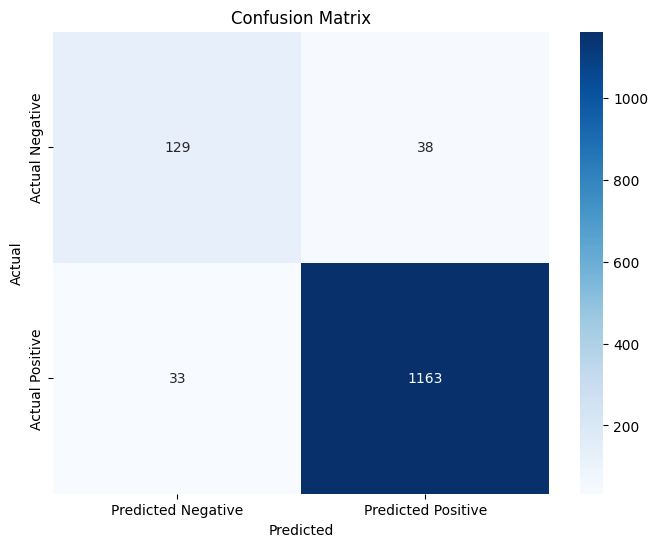

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 혼동 행렬 생성 및 시각화 함수
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# 혼동 행렬 시각화
plot_confusion_matrix(y_test, y_pred)



*   True Negative (TN): 129 - 모델이 실제 부정을 부정으로 올바르게 예측한 경우입니다.

*   False Positive (FP): 38 - 모델이 실제 부정을 긍정으로 잘못 예측한 경우입니다.

*   False Negative (FN): 33 - 모델이 실제 긍정을 부정으로 잘못 예측한 경우입니다.


*   True Positive (TP): 1163 - 모델이 실제 긍정을 긍정으로 올바르게 예측한 경우입니다.

모델은 1163개의 실제 긍정을 정확하게 예측하였으며, 이는 모델의 높은 재현율과 정밀도로 이어집니다.

부정 샘플에 대해서는 129개의 실제 부정을 정확하게 예측하였으나, 38개의 부정을 긍정으로 잘못 예측했습니다.

전반적으로 혼동 행렬을 통해 모델이 긍정 샘플을 잘 예측하고 있음을 알 수 있습니다. 부정 샘플에 대한 예측 성능을 향상시키기 위해 추가적인 조치가 필요할 수 있습니다.


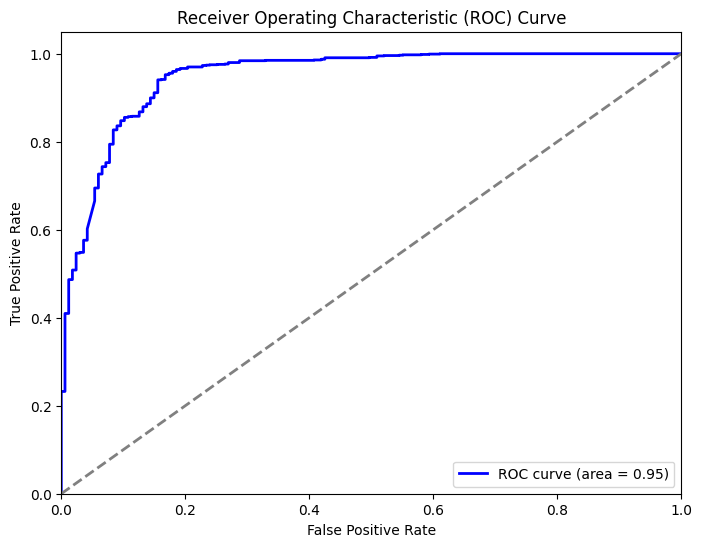

In [36]:
from sklearn.metrics import roc_curve, auc

# ROC 곡선 생성 및 시각화 함수
def plot_roc_curve(y_test, y_prob):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# 예측 결과 및 확률 계산
y_prob = best_model.predict_proba(X_test_tfidf)[:, 1]

# ROC 곡선 시각화
plot_roc_curve(y_test, y_prob)

ROC 곡선의 아래 면적 (AUC, Area Under Curve)은 0.95로, 이는 모델의 분류 성능이 매우 뛰어남을 나타냅니다. 대각선의 회색 점선은 랜덤 분류기를 나타내며, ROC 곡선이 이 선에서 멀어질수록 모델의 성능이 좋음을 의미합니다.

ROC 곡선의 AUC 값이 0.95라는 것은 모델이 실제 긍정과 부정을 잘 구분하고 있음을 나타내며, FPR이 낮고 TPR이 높은 이상적인 ROC 곡선을 보여주고 있다고 볼 수 있습니다.